<div style="text-align:center; font-family: Times New Roman, serif;">
<span style="color:Orange; font-family: Times New Roman, serif; font-weight: bold;">
<span class="cm-header cm-header-1">
INSURANCE CLAIM PREDICTION MODEL</span>
</div>

<span style="color:blue">
<span class="cm-header cm-header-2">
 To help an Insurance Marketing Team to identify the customers who would opt for the insurance</span>

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">
                                                                      
Using multiple python-based ML and data science libraries,we identified a suitable model to predict the customer acquisition success rate in this notebook
<br>
<br>
<div style="font-family: Calibri; font-size: 16pt;">
The following pipeline is followed:
<br>
<span style="font-family: Calibri; font-weight: bold; font-size: 14pt;">
    1. Problem Statement<br>
    2. Data<br>
    3. Evaluation Metrics<br>
    4. Domain Analysis<br>
    5. EDA<br>
    6. Data Pre-Processing<br>
    7. Features Selection<br>
    8. Modelling<br>
    9. Model Comparison Report<br>
   10. Hyperparameter Tuning<br>
   11. Report on challanges faced<br>
   12. Experimentation<br>
   13. Conclusion</span>

</div>
<br>
<br>

<span style="color:Green">
<span class="cm-header cm-header-2">
1. Problem Statement


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
Task 1:-Create a predictive model which will help the insurance marketing team to know which customer will buy the product.
Task 2:-Suggestions to the Insurance market team to make customers buy the product.<br>
                                                                      </div>


<span style="color:Green">
<span class="cm-header cm-header-2">
2. Dataset


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
This dataset is provided by Kaggle.<br>
                                                                      



<span style="color:Green">
<span class="cm-header cm-header-2">
3. Evaluation Metrics


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  By looking at the target column, we understand that the project falls in  binary classification type.<br>
-  Target column is having two unique values i.e., 0 & 1, considering them as insurance got <u>claimed as 1</u> and <u>not claimed as 0</u>.<br>
-  For classification problem, we use different metrics such as <u>Accuracy, Precision, Recall, F1 score, ROC-AUC score</u>, etc. Many metrics are based on the Confusion Matrix, since it encloses all the relevant information about the algorithm and classification rule performance. We will primarily look at <span style="background-color: yellow;">Precision score</span>.<br>
                                                                      

<span style="color:Green">
<span class="cm-header cm-header-2">
4. Domain Analysis


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Various features will be identified and detailed
-  Due to privacy concerns, the company has not shared the names of the features. 

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  As column names specifies 'ind','reg','car','calc'. In this, 'ind' refers to individual personal details such Age, name. 'reg' refers to region/location. 'car' refers to car details. 'calc' refers to calculated features.
-  Columns  with postfix 'bin','cat' specifies
  1. 'bin' as binary features with 0 & 1.
  2. 'cat' as categorical features with range from lower to higher respectively.
  3. 'calc' represents a extra calculated features.
  4.  Remaining all features are continuous.


<span style="color:Maroon">
<span class="cm-header cm-header-2">
Preparing the Tools


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  we're going to use several libraries to build our model, some of them are listed below:


In [1]:
#basics libraries
import numpy as np
import pandas as pd
from scipy import stats

#visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns


#data preprocessing
from sklearn. model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


#model development
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#performance metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report


#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Data
data=pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)


<span style="color:Maroon">
<span class="cm-header cm-header-2">
Basic Checks

In [3]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [5]:
data.shape

(595212, 59)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  There are total 5,95,212 customer details.
-  Each datapoint represents individual customer details.
-  Dataset contains mixed data types ie., float64(10), int64(49).


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  From this we found 
      1. Negative values in few columns.
      2. There is no variance in Standard deviation.


In [8]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  As dataset is having no null values.
-  By some analysis we came to know, the data contains few -1 values which corresponds to the missing values which will be handled in pre-processing.


In [9]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [10]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  This dataset is represents multiple customers and their features of single insurance company named Porto Seguros's which is given as prefix of every column.<br>
-  From 59 columns, except "id" & "target" remaining all 57 columns are considered as independent features of individual customers.
-  Target column is having two unique values i.e., 0 & 1, considering them as insurance got claimed as 1 and not claimed as 0.
-  This comes under classification algorithm and it is highly imbalanced wrt target.
-  For insurance claimed we have 21694 datapoints and 573518 for not claimed.


<span style="color:Green">
<span class="cm-header cm-header-2">
5. Exploratory Data Analysis


<div style="font-family: Calibri; font-size: 16pt; line-height: 1.5;"">
-  Due to privacy concerns, the company has not shared the names of the features.<br> 
-  <span style="color:Red"><span class="cm-header cm-header-5">
As specified in the document, we skipped to perform EDA and continued with the pre-processing phase.</span> 

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  For simplicity, we are dividing the dataset based on the feature names like binary, categorical and continuous/calculated features, to check distributions individually.

#### BINARY FEATURES

In [11]:
bin_features=[]
for column in data:
    if column.endswith('bin'):
        bin_features.append(column)
print(bin_features)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [12]:
len(bin_features)

17

bin_features= data[['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']]
bin_features

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- A total of 17 binary features are present in dataset.

In [13]:
bin_features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


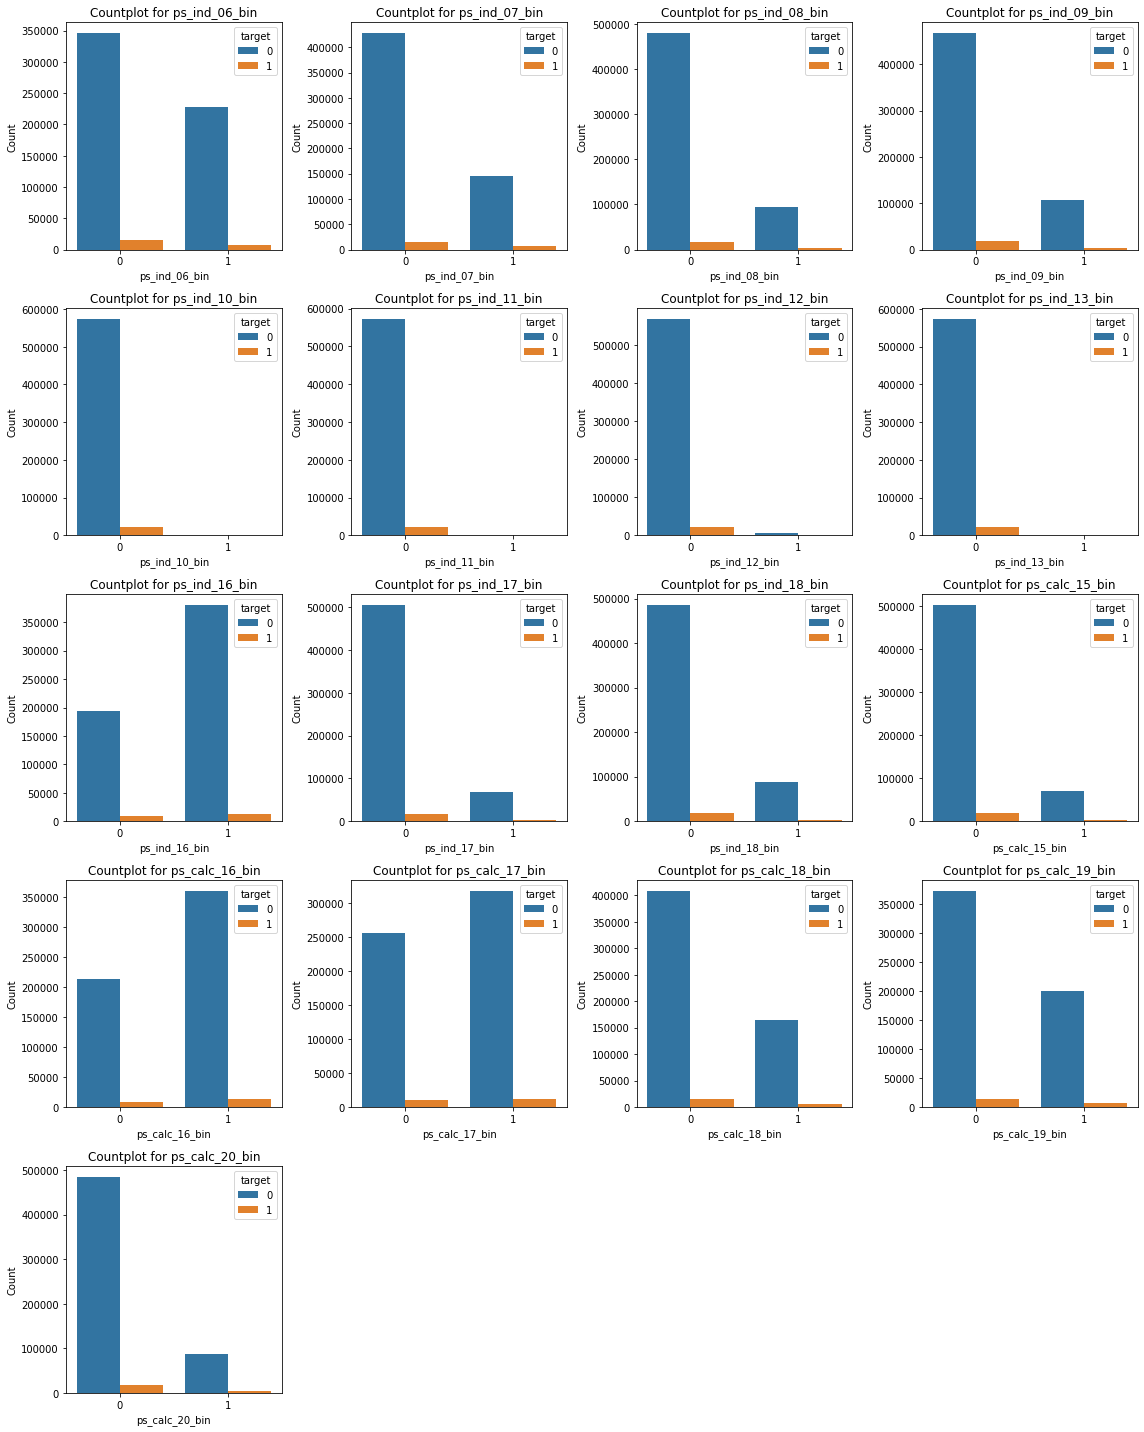

In [14]:
# Checking how binary features are correlated with target.

plt.figure(figsize=(16, 20))

for i, feature in enumerate(bin_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  There are no outliers in binary features.
-  Apart from a few calc features most of the binary features are dominated by a Zero value.
-  Some binary features like 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin' least account for the positive class at all whereas for most of the calc features 0's and 1's account almost equally for both positive and negative class.
-  Continuous features can be separated into calc and the rest. Both of them can be looked separately.


<AxesSubplot: title={'center': 'Correlation Between Binary Features'}>

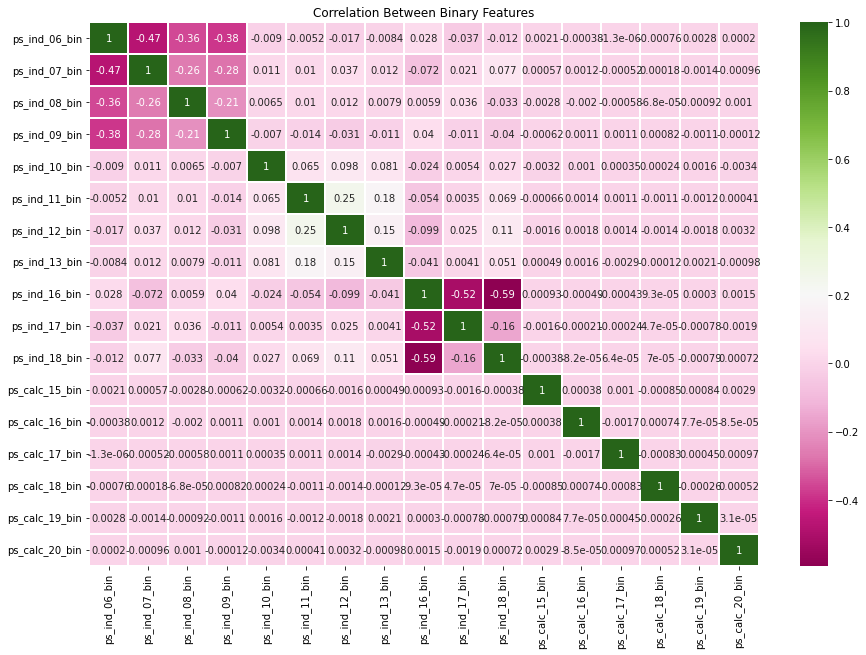

In [15]:
#Correlation Between Binary Features
plt.figure(figsize=(15,10))
plt.title("Correlation Between Binary Features")
sns.heatmap(data[bin_features].corr(), cmap='PiYG', annot = True, linewidths=0.01)


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  The binary features dont have any noticeable correlation between them. 'ps_ind_18_bin' and 'ps_ind_16_bin' have the largest negative correlation but nothing of great concern.



#### Categorical features


In [16]:
cat_features=[]
for column in data:
    if column.endswith('cat'):
        cat_features.append(column)
print(cat_features)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [17]:
len(cat_features)

14

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- A total of 14 categorical features are present in dataset.

cat_features=data[['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']]
cat_features

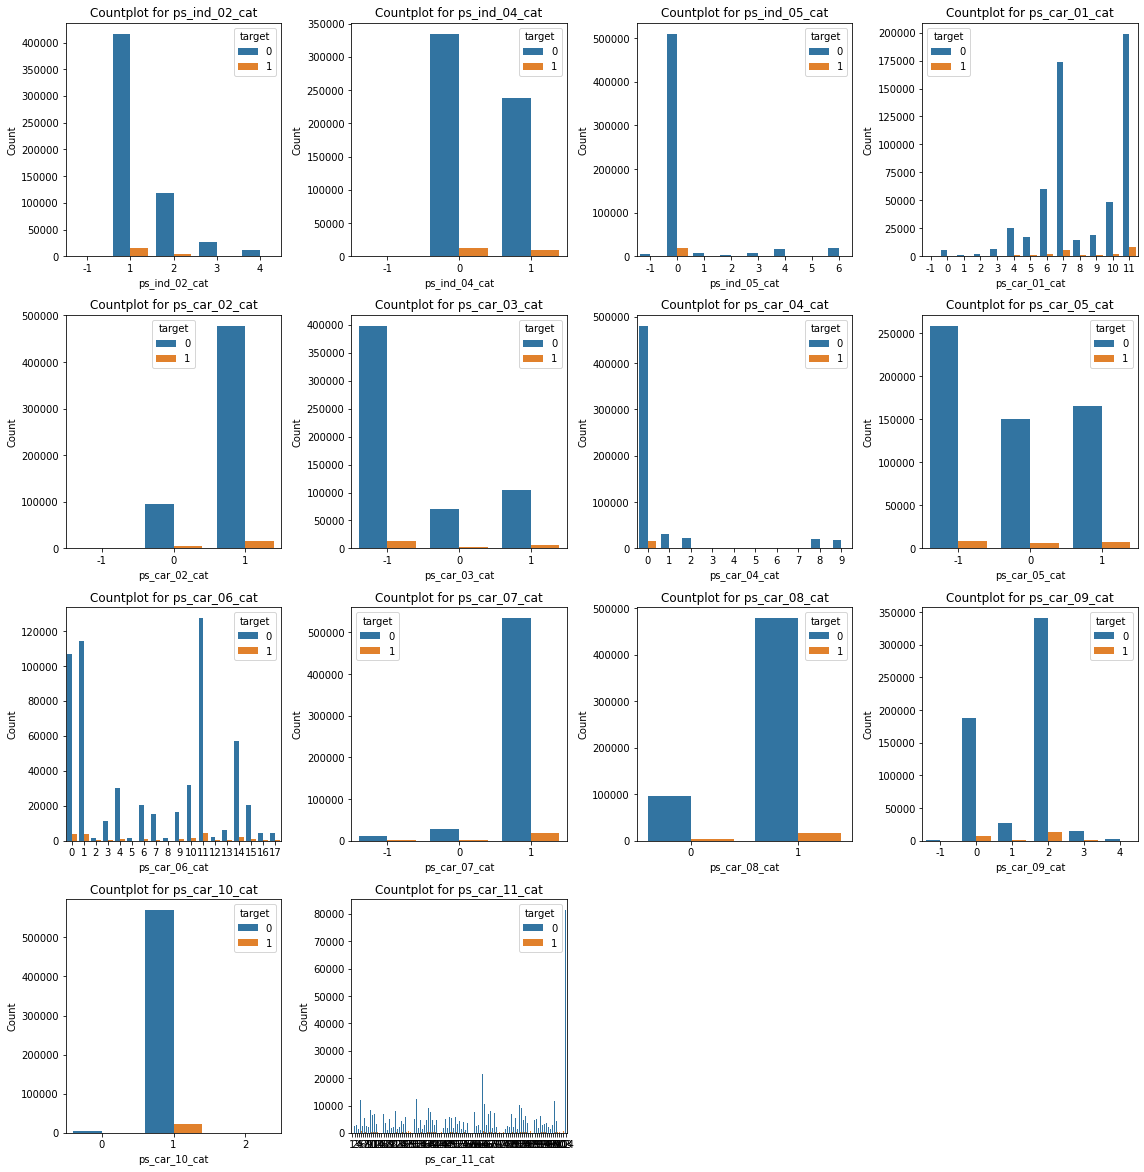

In [18]:
# Checking how categorical features are correlated with target.

plt.figure(figsize=(16, 20))

for i, feature in enumerate(cat_features):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Feature 'ps_car_11_cat' stands out in the categorical features since it has the highest cardinality. Rest all the features have relatively low cardinality.
-  Some features like 'ps_ind_05_cat' and 'ps_car_04_cat' mostly consists of a single value. Therefore the mode of these features can be used for filling their missing values.
-  The missing values of each of the categorical features can be filled.


In [19]:
cat_features=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


<AxesSubplot: title={'center': 'Correlation Between Categorical Features'}>

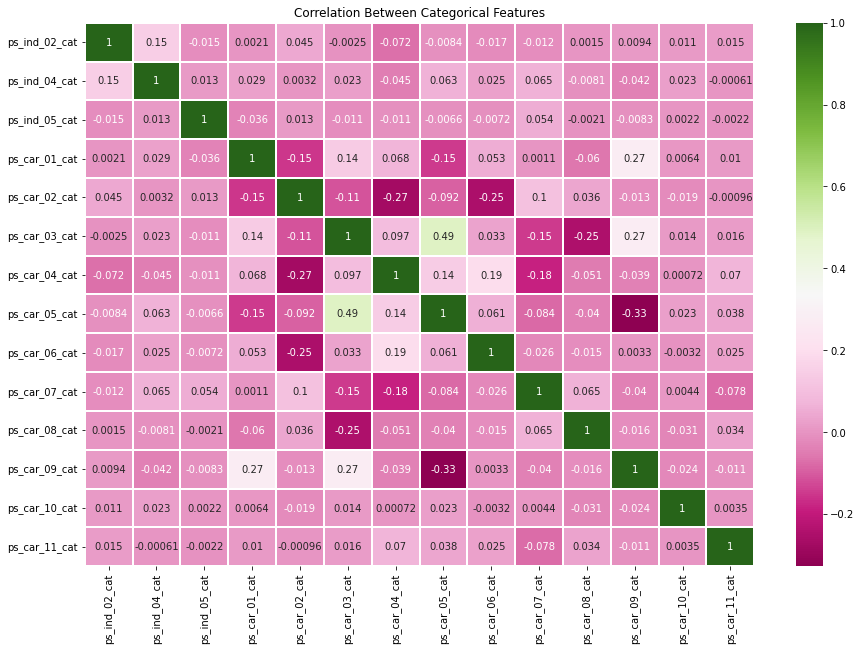

In [20]:
#Correlation Between Categorical Features

plt.figure(figsize=(15,10))
plt.title("Correlation Between Categorical Features")
sns.heatmap(data[cat_features].corr(), cmap='PiYG', annot = True, linewidths=0.01)


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Even categorical features dont have any noticeable correlation between them.


#### CONTINUOUS FEATURES

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Continuous features can be separated into calc and the rest. Both of them can be looked separately.



In [21]:
num_features_wo_calc= data[['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']]

In [22]:
num_features_wo_calc

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,2,5,0,11,0.7,0.2,0.718070,2,0.400000,0.883679,0.370810,3.605551
1,1,7,0,3,0.8,0.4,0.766078,3,0.316228,0.618817,0.388716,2.449490
2,5,9,0,12,0.0,0.0,-1.000000,1,0.316228,0.641586,0.347275,3.316625
3,0,2,0,8,0.9,0.2,0.580948,1,0.374166,0.542949,0.294958,2.000000
4,0,0,0,9,0.7,0.6,0.840759,3,0.316070,0.565832,0.365103,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,10,0,13,0.5,0.3,0.692820,3,0.374166,0.684631,0.385487,2.645751
595208,5,3,0,6,0.9,0.7,1.382027,2,0.387298,0.972145,-1.000000,3.605551
595209,1,10,0,12,0.9,0.2,0.659071,3,0.397492,0.596373,0.398748,1.732051
595210,5,3,0,12,0.9,0.4,0.698212,3,0.374166,0.764434,0.384968,3.162278


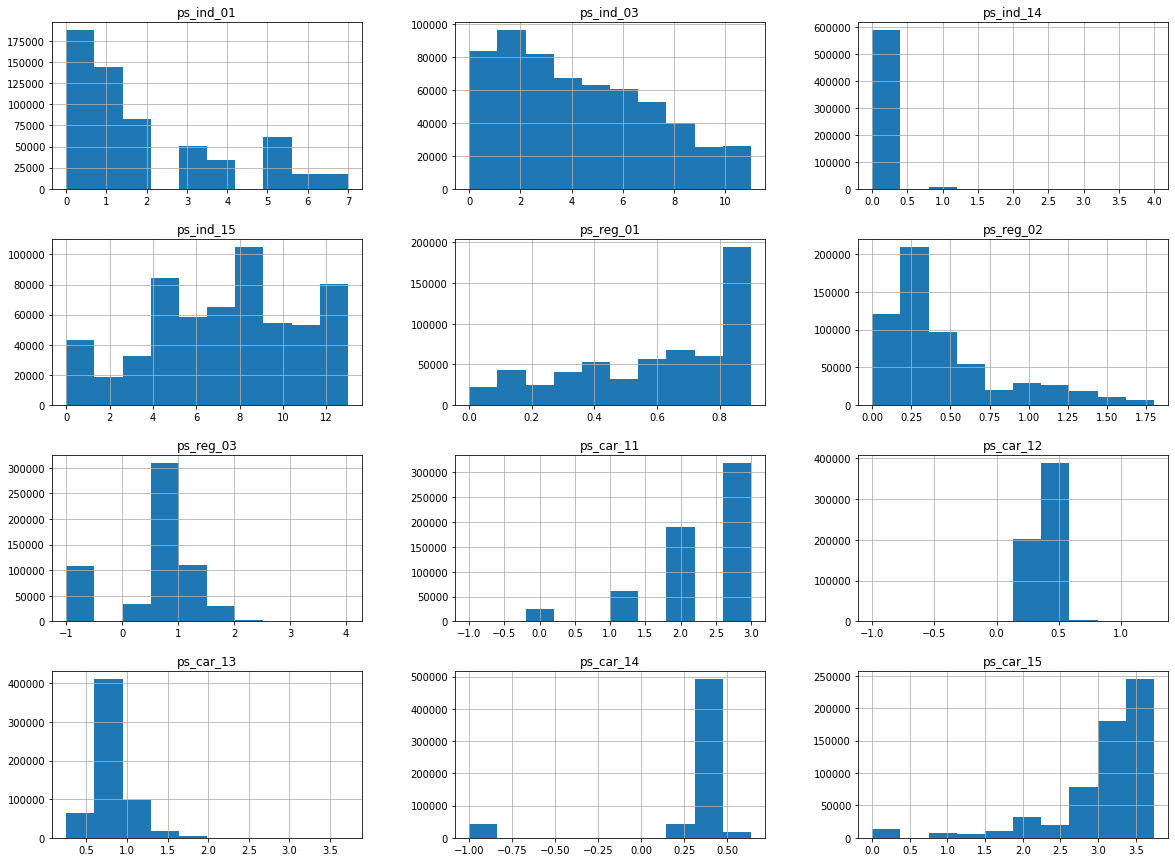

In [23]:
# Checking the distibution of numerical features without calculated.

data[['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']].hist(figsize=(20,15))
plt.show()

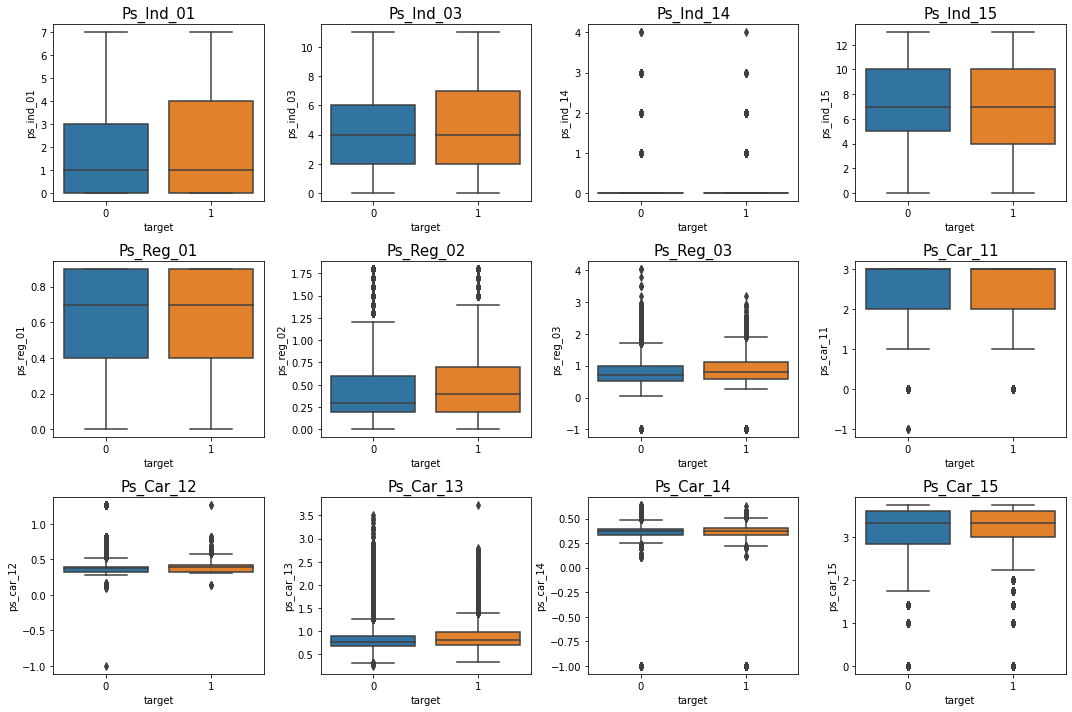

In [24]:
# boxplots for numerical features without calculated wrt target.

fig, ax= plt.subplots(3,4, figsize=(15, 10))

num_features_wo_calc= data[['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15']]
for col, ax in zip(num_features_wo_calc, ax.flatten()):
    sns.boxplot(x='target',y=col, data=data, ax=ax)

    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  The data has no outliers.
-  The boxplots shows the seperabilty of each feature with the class labels. Although the features doesnt seem to exhibit high varying patterns for the two classes, there are small differences in skewness and mean that could help in separating both classes.
<br>
-  For example features like 'ps_ind_01', 'ps_reg_02', 'ps_ind_03','ps_car_13' all have different skews and distribution of data for both classes. Those features could prove valuable in determining the final result.<br>
-  'ps_reg_02' in particular has a noticeable difference in mean and distribution for both classes.<br>
-  there are small differences in skewness and mean that could help in separating both classes.<br>


In [25]:
num_features_with_calc=data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']]

In [26]:
num_features_with_calc

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8
1,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9
2,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7
3,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9
4,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6
595208,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8
595209,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6
595210,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2


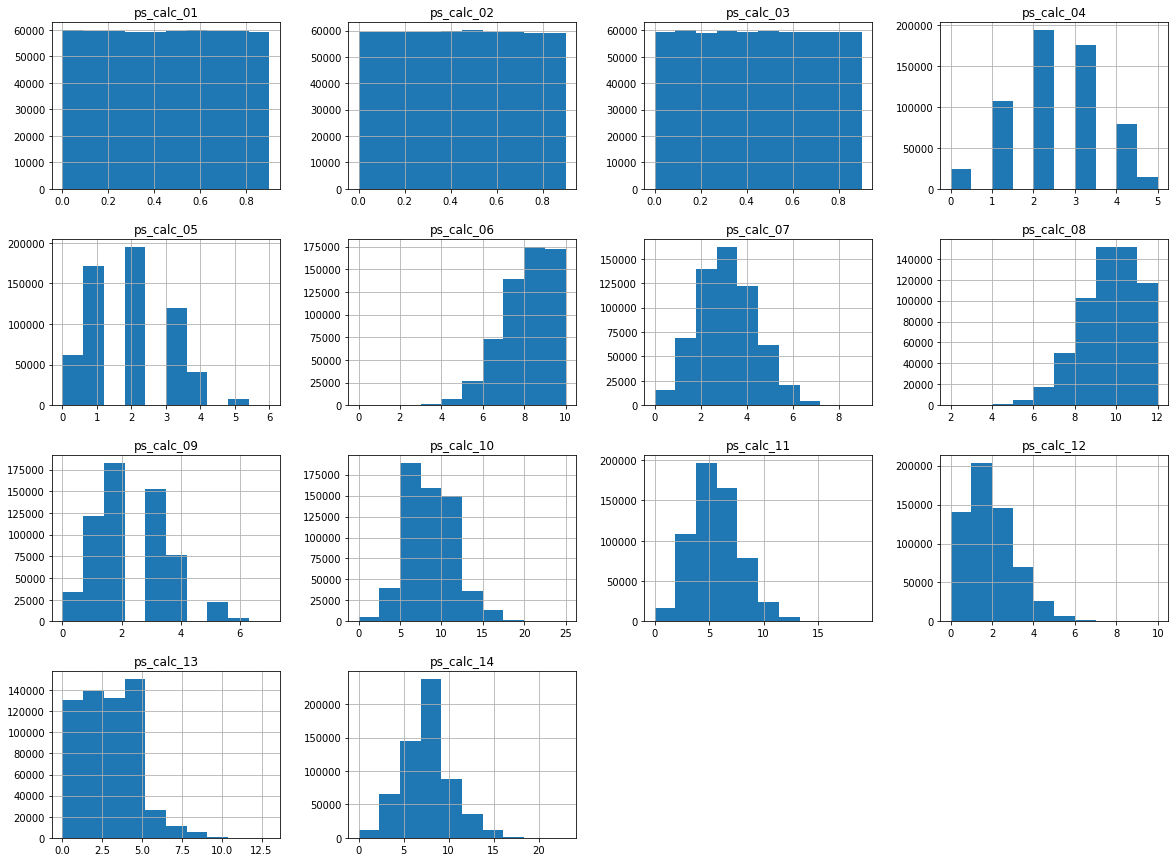

In [27]:
# Checking the distibution of numerical features with calculated.

data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']].hist(figsize=(20,15))
plt.show()

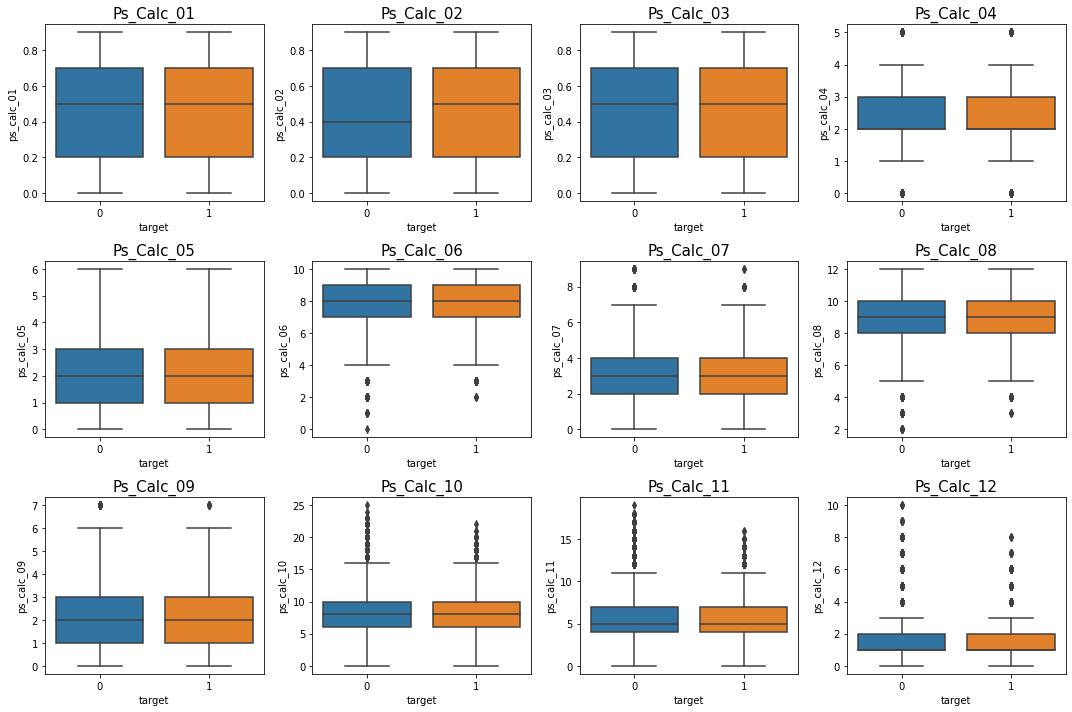

In [28]:
# boxplots for numerical features with calculated wrt target.


fig, ax= plt.subplots(3,4, figsize=(15, 10))
num_features_with_calc=data[['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']]

for col, ax in zip(num_features_with_calc, ax.flatten()):
    sns.boxplot(x='target',y=col, data=data, ax=ax)

    ax.set_title(col.title(), fontsize=15);

plt.tight_layout()


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Apart from 'ps_calc_02' there is no difference between the two class distributions in any of the calc features. There is no valuable info provided by any of the calc features.


<span style="color:Green">
<span class="cm-header cm-header-2">
6. Data Pre-Processing

In [21]:
# dropping the id column
data.drop('id',axis=1,inplace=True)

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  ID columns are generally unique values assgined to customers. it is not affecting the target variable. So lets remove 'id' column from the dataset, Otherwise it increasing the dimentionality of the dataset for no reason.



In [22]:
data.shape

(595212, 58)

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- After droping 'id' we have 58 features including 'target' column.

In [23]:
data.duplicated().sum()

0

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- No Duplicates found in the dataset.

<span style="color:Maroon">
<span class="cm-header cm-header-2">
Handling Missing Values

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  As mentioned earlier dataset is having NaN values replaced with -1.
-  we are replacing -1 values with NaN.

In [24]:
data=data.replace(-1,np.NaN)
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [25]:
data.isnull().sum()

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [26]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  without disturbing the datapoints with 1, we are dropping datapoints with NaN values from 0, as dataset is having more datapoints for Zeros.

In [27]:
data = data.loc[~((data['target'] == 0) & data.isna().any(axis=1))]

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  As these two columns 'ps_car_03_cat' & 'ps_car_05_cat' are having more than 50% we are dropping these two columns.

In [28]:
data.drop(columns=['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True)

In [29]:
data.shape

(140955, 56)

In [30]:
data.target.value_counts()

0    119261
1     21694
Name: target, dtype: int64

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  After dropping we have same count for 1's and we reduced count only for 0's.<br>
-  The missing values of are replaced by mean or mode and the numerical features can be filled by either mean or median based on their distributions.



In [31]:
data.ps_ind_02_cat = np.where(np.isnan(data.ps_ind_02_cat), data['ps_ind_02_cat'].mean(), data.ps_ind_02_cat)
data.ps_ind_04_cat = np.where(np.isnan(data.ps_ind_04_cat), data['ps_ind_04_cat'].mean(), data.ps_ind_04_cat)
data.ps_ind_05_cat = np.where(np.isnan(data.ps_ind_05_cat), data['ps_ind_05_cat'].mode(), data.ps_ind_05_cat)
data.ps_reg_03 = np.where(np.isnan(data.ps_reg_03), data['ps_reg_03'].median(), data.ps_reg_03)
data.ps_car_01_cat = np.where(np.isnan(data.ps_car_01_cat), data['ps_car_01_cat'].mean(), data.ps_car_01_cat)
data.ps_car_02_cat = np.where(np.isnan(data.ps_car_02_cat), data['ps_car_02_cat'].mean(), data.ps_car_02_cat)
data.ps_car_07_cat = np.where(np.isnan(data.ps_car_07_cat), data['ps_car_07_cat'].mode(), data.ps_car_07_cat)
data.ps_car_09_cat = np.where(np.isnan(data.ps_car_09_cat), data['ps_car_09_cat'].mean(), data.ps_car_09_cat)
data.ps_car_11 = np.where(np.isnan(data.ps_car_11), data['ps_car_11'].mode(), data.ps_car_11)
data.ps_car_12 = np.where(np.isnan(data.ps_car_12), data['ps_car_12'].mode(), data.ps_car_12)
data.ps_car_14 = np.where(np.isnan(data.ps_car_14), data['ps_car_14'].mode(), data.ps_car_14)

In [32]:
data.isnull().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- All missing values are replaced wrt mean,median,mode.

<span style="color:Maroon">
<span class="cm-header cm-header-2">
Declaring Features and Target

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  Before moving to next phase, let's first seperate the all features and target from the dataset.

In [33]:
x=data.drop('target',axis=1 )
y=data['target']

In [34]:
print(x.shape, y.shape)

(140955, 55) (140955,)


<span style="color:Maroon">
<span class="cm-header cm-header-2">SCALING

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  Creating a DataFrame for the scaled data as df.

<span style="color:Green">
<span class="cm-header cm-header-2">
7. Features Selection

In [35]:
from sklearn.ensemble import RandomForestRegressor
x=data.drop('target',axis=1)
y=data['target']
# Train your Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)


RandomForestRegressor(random_state=42)

In [36]:
importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)


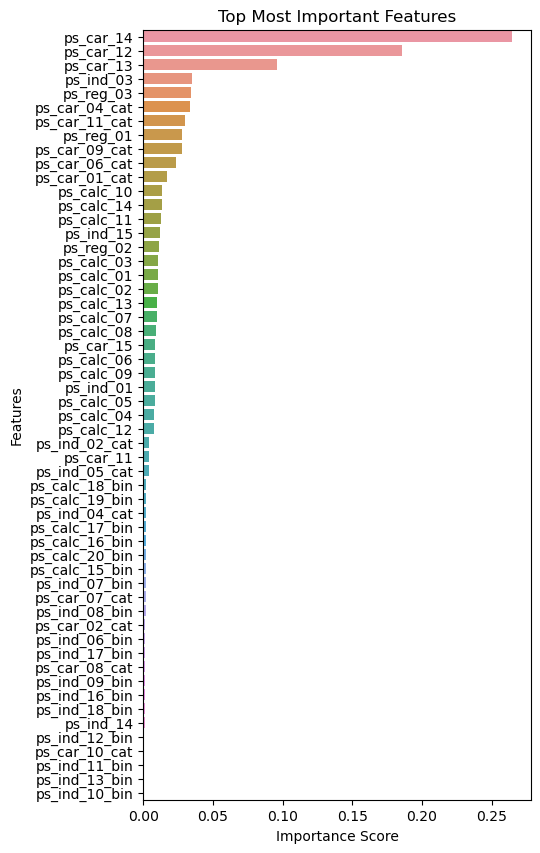

In [37]:
plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [38]:
data.drop(['ps_ind_10_bin', 'ps_ind_11_bin','ps_ind_12_bin', 'ps_ind_13_bin','ps_car_10_cat','ps_ind_14','ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin','ps_ind_09_bin','ps_car_08_cat','ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin','ps_ind_04_cat','ps_ind_07_bin','ps_car_07_cat','ps_ind_08_bin','ps_car_02_cat','ps_ind_06_bin'],axis=1,inplace=True)
data

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_05_cat,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_04_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
3,0,0,1.0,2,0.0,8,0.9,0.2,0.580948,7.0,0,11,3.0,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9
7,0,5,1.0,4,0.0,13,0.7,0.4,0.607248,11.0,0,11,2.0,30,3.0,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6
9,1,1,1.0,2,0.0,4,0.9,1.4,2.316652,11.0,1,14,2.0,104,2.0,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6
13,0,1,1.0,3,0.0,12,0.7,0.9,0.684197,9.0,0,6,2.0,104,3.0,0.400000,0.983311,0.356090,3.605551,0.8,0.7,0.6,2,1,10,1,8,3,8,2,0,4,3
17,0,5,1.0,6,1.0,4,0.9,0.5,0.810864,11.0,0,11,2.0,104,2.0,0.316228,0.876295,0.320780,3.605551,0.2,0.6,0.1,1,3,8,2,9,1,10,9,1,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595198,0,5,1.0,7,0.0,11,0.8,0.5,0.839643,11.0,0,11,2.0,101,3.0,0.374166,0.842359,0.321403,3.316625,0.5,0.3,0.1,3,2,9,5,8,2,10,6,2,2,14
595201,0,0,2.0,2,0.0,5,0.4,0.0,0.812404,11.0,0,11,2.0,19,3.0,0.316228,0.605399,0.318591,2.449490,0.7,0.6,0.6,4,0,9,3,9,2,11,4,1,2,6
595202,0,4,1.0,3,0.0,2,0.5,0.0,0.366572,9.0,0,11,0.0,53,2.0,0.447214,0.744248,0.377492,2.449490,0.7,0.5,0.0,2,2,7,3,8,2,7,11,6,2,6
595203,0,3,2.0,3,0.0,5,0.9,1.4,1.939233,7.0,0,14,2.0,72,3.0,0.400000,1.135400,0.350428,3.741657,0.8,0.6,0.2,4,1,7,2,10,1,11,5,2,1,6


# slitting

In [39]:
x=data.drop('target',axis=1)
y=data['target']


In [40]:
x.shape

(140955, 32)

In [41]:
y.shape

(140955,)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(98668, 32)
(42287, 32)
(98668,)
(42287,)


# scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


# smoting

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(X_train_scaled,y_train)

In [45]:
from collections import Counter
print('actual',Counter(y_train))
print('smote',Counter(y_train_smote))

actual Counter({0: 83478, 1: 15190})
smote Counter({0: 83478, 1: 83478})


## creating models

<span style="color:Green">
<span class="cm-header cm-header-2">
8. Modelling

##### LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
#instantiating the object
lr= LogisticRegression()
#training the model
lr.fit(x_train_smote, y_train_smote)
#predicting
y_pred= lr.predict(X_test_scaled)

print('classificationreport-\n',classification_report(y_test, y_pred))

pre_lr= precision_score(y_test,y_pred)
print("Precision score: ", pre_lr)


classificationreport-
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     35783
           1       0.42      0.66      0.52      6504

    accuracy                           0.81     42287
   macro avg       0.68      0.75      0.70     42287
weighted avg       0.85      0.81      0.83     42287

Precision score:  0.4245648930880159


##### DECISION TREE CLASSIFIER

In [47]:
# Create an instance of the decision tree model
tree = DecisionTreeClassifier()

# Fit the model to the training data
tree.fit(x_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_tree= tree.predict(X_test_scaled)

print(classification_report(y_test, y_pred_tree))

pre_tree= precision_score(y_test,y_pred_tree)
print("Precision score: ", pre_tree)


              precision    recall  f1-score   support

           0       0.95      0.93      0.94     35783
           1       0.64      0.72      0.68      6504

    accuracy                           0.89     42287
   macro avg       0.79      0.82      0.81     42287
weighted avg       0.90      0.89      0.90     42287

Precision score:  0.6414496348353314


##### RANDOM FOREST CLASSIFIER

In [48]:
#instantiating object
rf = RandomForestClassifier()

#fitting the model
rf.fit(x_train_smote, y_train_smote)

#predicting
y_pred_rf= rf.predict(X_test_scaled)

print('classificationreport-\n',classification_report(y_test, y_pred_rf))

pre_rf= precision_score(y_test,y_pred_rf)
print("precision score:", pre_rf)

classificationreport-
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     35783
           1       0.96      0.66      0.78      6504

    accuracy                           0.94     42287
   macro avg       0.95      0.83      0.87     42287
weighted avg       0.94      0.94      0.94     42287

precision score: 0.9573850959393128


###### ADA BOOST CLASSIFIER

In [49]:
#instantiating the object
ada_boost= AdaBoostClassifier()

#fitting the model
ada_boost.fit(x_train_smote, y_train_smote)

#predicting
y_pred_ada_boost=ada_boost.predict(X_test_scaled)

print('classificationreport-\n',classification_report(y_test, y_pred_ada_boost))

pre_ada= precision_score(y_test,y_pred_ada_boost)
print("Precision score: ", pre_ada)


classificationreport-
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     35783
           1       0.59      0.61      0.60      6504

    accuracy                           0.87     42287
   macro avg       0.76      0.77      0.76     42287
weighted avg       0.88      0.87      0.88     42287

Precision score:  0.5907330154946365


##### XG BOOST CLASSIFIER

In [50]:
#instantiating the object
xgboost= XGBClassifier()

#fitting the model
xgboost.fit(x_train_smote, y_train_smote)

#predicting
y_pred_xgboost= xgboost.predict(X_test_scaled)

print('classificationreport-\n',classification_report(y_test, y_pred_xgboost))

pre_xg= precision_score(y_test,y_pred_xgboost)
print("Precision score:", pre_xg)


classificationreport-
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     35783
           1       0.98      0.72      0.83      6504

    accuracy                           0.95     42287
   macro avg       0.97      0.86      0.90     42287
weighted avg       0.96      0.95      0.95     42287

Precision score: 0.9793233082706767


<span style="color:Green">
<span class="cm-header cm-header-2">
9. Model Comparison Report

In [51]:
models = pd.DataFrame([pre_lr,pre_tree,pre_rf,pre_ada,pre_xg],
             index=['Logistic Regression','Decision Tree','Random Forest','Ada Boost ','XG Boost'],columns=['Precision'])
models

,Precision
Logistic Regression,0.424565
Decision Tree,0.641450
Random Forest,0.957385
Ada Boost,0.590733
XG Boost,0.979323


<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  The computational time required for SVC, KNN model is much higher, hence we have excluded them.
-  Top performing classifiers on the given dataset are Random Forest. 
-  For model selection, we will do the hyper-parameter tuning for Random Forest. It might improve the precision score and in turn helps us selecting model with highest precision score.



<span style="color:Green">
<span class="cm-header cm-header-2">
10. Hyperparameter Tuning

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">
-  we tried hyperparameter tuning for XGBoost.<br>
-  Since the dataset is considerably large, it is taking hours of time to find best parameters using GridSearchCV because it performs an exhaustive search over specified parameter values for an estimator. Instead we will use RandomizedSearchCV.<br>
-  Instead of exhaustively searching over all possible combinations of hyperparameters, RandomizedSearchCV samples a random subset of combinations, making it a more computationally efficient alternative to GridSearchCV.<br>

In [52]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(x_train_smote, y_train_smote)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.8, 'reg_alpha': 0.4, 'n_estimators': 80, 'learning_rate': 0.06, 'gamma': 0})


In [53]:
XGB2=XGBClassifier(reg_lambda= 0.8, reg_alpha= 0.4, n_estimators=80, learning_rate=0.06, gamma=0)
XGB2.fit(x_train_smote, y_train_smote)#training 
y_predict=XGB2.predict(X_test_scaled)#testing


In [54]:
pre_xg1= precision_score(y_test,y_predict)
print("Precision score:", pre_xg1)


Precision score: 0.9439572192513369


<span style="color:Green">
<span class="cm-header cm-header-2">
11. Reports on challenges faced

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.5;"">

-  Due to privacy reasons, name of the features were not given which became a biggest challenge while doing he domain analysis. 
-  Individual features names will definetly helps in knowing more about dataset and can expect better results.
-  Dataset is highly imbalanced wrt 'target' column with 573518 zero's and 21694 one's. which has dominating effect on the performance.
-  we tried running our model with different sampling techniques like staratified sampling, undersampling, oversampling.
-  Data is highly imbalanced, which has dominating effect on the performance. It can be seen that when we have reduced the domination target, the precision score of the model tend to increase.
-  In return, we have run the models using multiple combinations.
-  In attempts of increasing performance of the model, we have tried with randomundersampling, which again failed to give us promising precision scores.
We trained several models, including Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boost, XGBoost, and ANN. The top performing classifiers on the given dataset were Random Forest and Decision Tree.

<span style="color:Green">
<span class="cm-header cm-header-2">
12. Experimentation

<span style="color:Maroon">
<span class="cm-header cm-header-4">
Experiment 1

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

-  we have tried randomundersampling technique for balancing the data, but results are not upto the mark.
-  as the computational time is more when applied with SMOTE, we have tried to balance the data by random under sampling technique. But the scores for this are not so great.

<span style="color:Maroon">
<span class="cm-header cm-header-4">
Experiment 2

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

- As we are loosing some information by dropping missing value rows, so we are experimenting with our algorithms by not deleting the rows and by just imputing them.
in this case, our algorithms failed to give good precision scores.

In [29]:
# WITHOUR DROPPING THE ROWS
df=pd.read_csv('train.csv')

In [30]:
df=df.replace(-1,np.NaN)
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [31]:
df.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [32]:
df.drop(columns=['ps_car_03_cat','ps_car_05_cat'],axis=1,inplace=True)

In [33]:
df.ps_ind_02_cat = np.where(np.isnan(df.ps_ind_02_cat), df['ps_ind_02_cat'].mean(), df.ps_ind_02_cat)
df.ps_ind_04_cat = np.where(np.isnan(df.ps_ind_04_cat), df['ps_ind_04_cat'].mean(), df.ps_ind_04_cat)
df.ps_ind_05_cat = np.where(np.isnan(df.ps_ind_05_cat), df['ps_ind_05_cat'].mode(), df.ps_ind_05_cat)
df.ps_reg_03 = np.where(np.isnan(df.ps_reg_03), df['ps_reg_03'].median(), df.ps_reg_03)
df.ps_car_01_cat = np.where(np.isnan(df.ps_car_01_cat), df['ps_car_01_cat'].mean(), df.ps_car_01_cat)
df.ps_car_02_cat = np.where(np.isnan(df.ps_car_02_cat), df['ps_car_02_cat'].mean(), df.ps_car_02_cat)
df.ps_car_07_cat = np.where(np.isnan(df.ps_car_07_cat), df['ps_car_07_cat'].mode(), df.ps_car_07_cat)
df.ps_car_09_cat = np.where(np.isnan(df.ps_car_09_cat), df['ps_car_09_cat'].mean(), df.ps_car_09_cat)
df.ps_car_11 = np.where(np.isnan(df.ps_car_11), df['ps_car_11'].mode(), df.ps_car_11)
df.ps_car_12 = np.where(np.isnan(df.ps_car_12), df['ps_car_12'].mode(), df.ps_car_12)
df.ps_car_14 = np.where(np.isnan(df.ps_car_14), df['ps_car_14'].mode(), df.ps_car_14)

In [34]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [35]:
x_df=df.drop('target',axis=1 )
y_df=df['target']
print(x_df.shape, y_df.shape)

(595212, 56) (595212,)


In [36]:
#scaling the data usning StandardScaler technique.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(x_df)
scaled_df

array([[-1.7323077 ,  0.0502179 ,  0.96550742, ..., -0.63472992,
        -0.73222528,  2.34997253],
       [-1.73230305, -0.45386836, -0.54262441, ..., -0.63472992,
         1.36569991, -0.42553689],
       [-1.73229373,  1.56247669,  3.98177109, ..., -0.63472992,
         1.36569991, -0.42553689],
       ...,
       [ 1.73327863, -0.45386836, -0.54262441, ..., -0.63472992,
        -0.73222528, -0.42553689],
       [ 1.73328794,  1.56247669,  0.96550742, ...,  1.57547323,
        -0.73222528, -0.42553689],
       [ 1.73330192, -0.95795462, -0.54262441, ..., -0.63472992,
        -0.73222528, -0.42553689]])

In [39]:
df_scaled=pd.DataFrame(data=scaled_df, columns= x_df.columns)
df_scaled

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,-1.732308,0.050218,0.965507,0.213594,1.182507,-0.30873,-0.805893,1.700163,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.043440,-1.395821,2.694238,-0.425746,0.309442,-0.591654,-0.506132,0.679553,0.452657,-0.336757,-0.464486,0.232701,-2.226032,-1.363723,0.085839,-1.521114,-0.415746,0.343965,0.313526,-0.066654,0.737869,0.523136,0.175713,-0.870090,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,-1.732303,-0.453868,-0.542624,0.954362,-0.845779,-0.30873,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,-1.212598,-1.395821,-0.371162,2.348817,0.657096,-0.096928,-0.353536,1.078728,0.452657,-0.336757,0.807908,0.232701,0.449230,0.685266,0.085839,-1.309073,0.785466,-1.092963,-0.865800,0.339582,-0.842820,-0.521440,-1.218534,-0.521844,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,-1.732294,1.562477,3.981771,1.695130,1.182507,-0.30873,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.325445,0.716424,-0.371162,-0.425746,-2.124135,-1.086380,-0.240749,-0.517971,0.452657,-0.336757,1.353220,0.232701,0.449230,0.685266,0.085839,-0.067116,-1.616957,-1.092963,-0.764418,-0.600594,0.342818,0.174944,0.872836,-1.218337,-0.333042,0.100547,0.982196,-1.417981,-0.839850,-0.271891,-0.493559,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,-1.732287,-0.957955,-0.542624,-0.897559,-0.845779,-0.30873,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.197425,0.716424,-0.371162,-0.425746,1.004750,-0.591654,-0.941992,-0.517971,0.452657,-0.336757,0.807908,0.232701,0.449230,1.709760,0.085839,1.265715,-1.616957,-0.099165,-1.203608,-1.787534,-1.457410,0.523136,1.569960,-1.218337,-0.333042,1.862777,-0.516705,-1.417981,-0.839850,1.332025,-2.214970,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,-1.732284,-0.957955,0.965507,-1.638327,1.182507,-0.30873,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.479430,0.716424,-0.371162,-0.425746,0.309442,0.397799,-0.116155,1.078728,0.452657,-0.336757,1.353220,0.232701,0.449230,0.685266,0.085839,0.599299,0.785466,-1.095676,-1.101721,-0.196135,-1.457410,-0.173248,0.524274,-1.566584,-0.333042,0.100547,-1.266155,-0.004117,0.530322,-0.271891,1.227851,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1.733269,0.554304,-0.542624,2.065514,-0.845779,-0.30873,-0.805893,-0.588179,-0.442786,2.096794,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.607449,0.716424,-0.371162,-0.425746,-0.385866,-0.344291,-0.586392,0.679553,0.452657,-0.336757,-1.009797,0.232701,0.449230,-1.363723,0.085839,-0.945573,0.785466,-0.099165,-0.572756,0.266322,-0.574471,-0.173248,0.175713,-0.521844,0.5

In [40]:
X_df=df_scaled
Y_df=data['target']

In [41]:
from imblearn.under_sampling import RandomUnderSampler

rus_df = RandomUnderSampler(random_state=42)
x_resampled_df, y_resampled_df = rus_df.fit_resample(X_df, Y_df)


In [42]:
X_train_df, X_test_df, Y_train_df, Y_test_df = train_test_split(x_resampled_df,y_resampled_df,test_size=0.2,random_state=42)
print(X_train_df.shape)
print(X_test_df.shape)
print(Y_train_df.shape)
print(Y_test_df.shape)


(34710, 56)
(8678, 56)
(34710,)
(8678,)


In [43]:
# Put Models in a Dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "XgBoost":XGBClassifier(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train_df, X_test_df, Y_train_df, Y_test_df):
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores_df = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_df, Y_train_df)
        # Evaluate the model and append its score to model_scores
        model_scores_df[name] = model.score(X_test_df, Y_test_df)
    return model_scores_df


In [44]:
model_scores_df = fit_and_score(models=models,
                             X_train_df=X_train_df,
                             X_test_df=X_test_df,
                             Y_train_df = Y_train_df,
                             Y_test_df = Y_test_df)
model_scores_df

{'Logistic Regression': 0.5878082507490205,
 'Decision Tree': 0.5145194745333026,
 'AdaBoost': 0.5973726665130215,
 'XgBoost': 0.5837750633786587,
 'KNN': 0.5343397096105094,
 'Random Forest': 0.587693016824153}

<AxesSubplot: >

<Figure size 720x360 with 0 Axes>

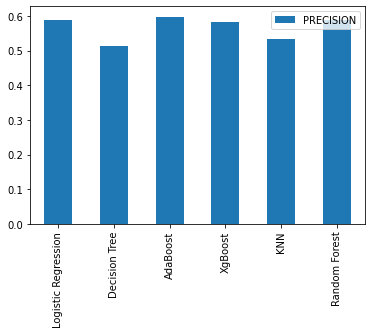

In [45]:
plt.figure(figsize = (10,5))
cmp_df= pd.DataFrame(model_scores_df, index=["PRECISION"])
cmp_df.T.plot.bar()


<span style="color:Green">
<span class="cm-header cm-header-2">
13. Conclusion

<div style="font-family: Calibri; font-size: 14pt; line-height: 1.0;"">

*  By considering all the pros and cons of our imbalanced dataset, we tried multiple sampling techniques such as random under sampling, random over sampling, and smote. Except for SMOTE, no other method produced better results. We also tried multiple models, but Random Forest produced significantly better results, so it was chosen as our machine learning algorithm for the project.
                                                  
*  As dataset is highly imbalanced, who claimed insurance in the dataset is less than those who did not claim insurance, and the model achieves a precision of 91%, it means that the model is good at predicting the positive class (customers who are likely to file an insurance claim), 
even if the positive class is small in comparison to the negative class (i.e., customers who are not likely to file a claim).

*  A precision of 91% means that 91% of all customers predicted by the model as likely to file a claim actually filed a claim. This implies that the model can accurately identify customers who are more likely to file an insurance claim. which can help insurance companies better allocate resources and manage risk.

*  The insurance marketing team should focus on building trust with customers, providing value, and addressing their specific needs to increase the likelihood of them purchasing the insurance product.